<a href="https://colab.research.google.com/github/Aayushmatkar/DataScienceApplications/blob/main/Copy_of_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import nltk
from nltk.corpus import gutenberg
import re
import os,random
import pandas as pd
nltk.download('punkt')
nltk.download('gutenberg')

def create_partitions(text, book_name, author):
    partitions = []
    words = nltk.word_tokenize(text)
    for i in range(0, len(words), 150):
        partitions.append((words[i:i+150], book_name, author))
    return partitions

#The books selected below are from the gutenberg module and are of different genre
book_names=['melville-moby_dick.txt','edgeworth-parents.txt','chesterton-thursday.txt','austen-emma.txt','shakespeare-hamlet.txt']

def random_sentences_with_book_name():
  result=pd.DataFrame(columns=['Text', 'Book Name','Author'])
  for i in book_names:
    # Splitting the book names to remove their 'txt' extension
    label_name=i.split('.')[0]

    # Getting the book names from Gutenberg and reading them
    book = gutenberg.raw(i)

    #Getting the book names and their respective authors
    lines = book.splitlines()

    #The first line consists information about the above comment
    line1=lines[0]
    
    #Removing the year from the line
    pattern = r'\D+'

    digits_removed = re.findall(pattern, line1)

    #Getting the author name
    author = re.search(r'\sby\s([\w\s\.]+)[\s\d{4}]+', digits_removed[0]).group(1)

    #Getting the book name
    book_name = re.search(r'\[([\w\s\']+)[\,]?\sby', line1).group(1)

    # Create partitions of 150 words each
    partitions = create_partitions(book, book_name, author)

    # Create 200 random samples of the partitions
    samples = random.sample(partitions, 200)

    # Using regular expressions to clean the data
    for i in range(len(samples)):
        samples[i] = (re.sub(r'[^\w\s]','', ' '.join(samples[i][0])), samples[i][1], samples[i][2])

    # Serialize the data using Pandas
    df = pd.DataFrame(samples, columns=['Text', 'Book Name','Author'])

    #Appending the random sentences of a book to the final dataframe 
    result=pd.concat([result,df])
  result.to_csv('book_partitions.csv', index=False)

  print("Data saved to book_partitions.csv.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [4]:
random_sentences_with_book_name()

Data saved to book_partitions.csv.


In [5]:
data=pd.read_csv('book_partitions.csv')

In [6]:
data['label']=0
data['label'][200:400]=1
data['label'][400:600]=2
data['label'][600:800]=3
data['label'][800:1000]=4

<ipython-input-6-f510ee5b3d00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'][200:400]=1
<ipython-input-6-f510ee5b3d00>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'][400:600]=2
<ipython-input-6-f510ee5b3d00>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'][600:800]=3
<ipython-input-6-f510ee5b3d00>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [7]:
data

,Text,Book Name,Author,label
0,the long straight edges are always kept The r...,Moby Dick,Herman Melville,0
1,I say three years but I am pretty sure it wa...,Moby Dick,Herman Melville,0
2,Shiver her shiver her So well that Boat...,Moby Dick,Herman Melville,0
3,whale Captain Ahab had evinced his customary ...,Moby Dick,Herman Melville,0
4,will be found in this volume but the leading ...,Moby Dick,Herman Melville,0
...,...,...,...,...
995,But if not Be you content to lend your patien...,The Tragedie of Hamlet,William Shakespeare,4
996,and resolue it selfe into a Dew Or that the ...,The Tragedie of Hamlet,William Shakespeare,4
997,will touch it Take you as twere some distant ...,The Tragedie of Hamlet,William Shakespeare,4
998,the baser nature comes Betweene the passe and...,The Tragedie of Hamlet,William Shakespeare,4


In [8]:
# ploting word cloud for the most frequent 20 words in each book  
import wordcloud
import matplotlib.pyplot as plt
import plotly.express as px


for label in data['label'].unique():
  books = data[data["label"]==label]["Text"]


# Creating  word cloud
  wc = wordcloud.WordCloud(background_color=None, max_words=20, 
                          max_font_size=100)
  wc = wc.generate(str(books))

# Converting  word cloud to dataframe
  words = list(wc.words_.keys())
  freq = [wc.words_[word] for word in words]
  data10 = {'words': words, 'freq': freq}
  df10 = pd.DataFrame(data10)

  # Creating  interactive word cloud
  fig = px.scatter(df10, x='words', y='freq', text='words', size='freq', color='freq')
  fig.update_layout(title='Interactive Word Cloud',
                    xaxis_title='Words',
                    yaxis_title='Frequency')
  fig.show()

#

In [9]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['label'], test_size=0.2, random_state=42)

In [10]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.fit_transform(X_test)
new_X_train=X_train_vectorized.toarray()
new_X_test = X_test_vectorized.toarray()

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

Clustered data points for X_train

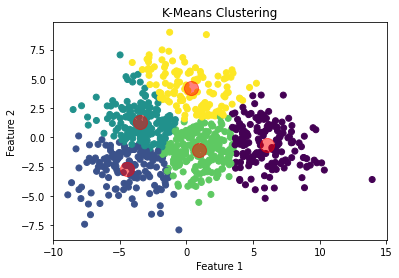

In [12]:
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_pca_train)

# Get the predicted cluster labels
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
# Plot the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

Unclustered Raw datapoints of data

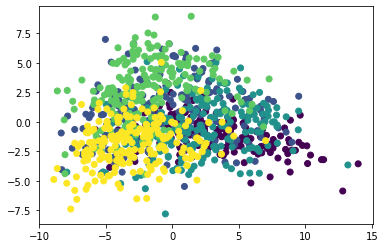

In [13]:
 data_vectorized=vectorizer.fit_transform(data['Text'])
 new_data_vectorized=data_vectorized.toarray()
 pca = PCA(n_components=2)
 X_pca_data=pca.fit_transform(new_data_vectorized)
 plt.scatter(X_pca_data[:, 0], X_pca_data[:, 1], c=data['label'])

Clustered data points for X_test

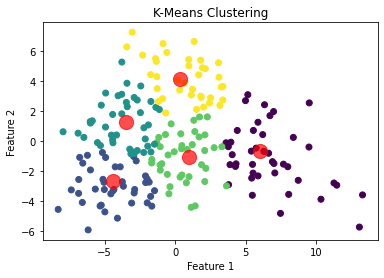

In [14]:
predicted_labels=kmeans.predict(X_pca_test)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=predicted_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

In [15]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, labels)

In [16]:
silhouette

0.3622217138210611

In [17]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, predicted_labels)
kappa

-0.08648142366531375

In [18]:
from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, predicted_labels)

print("Coherence:", ari)

Coherence: 0.14239634869389375


#EM (GAUSSIAN MIXTURE ) 

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

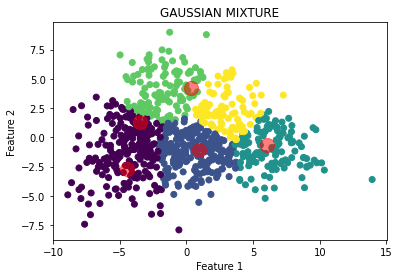

In [20]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(X_pca_train)

# Get the predicted cluster labels
gmm_labels = gmm.predict(X_pca_train)

# Plot the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=gmm_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('GAUSSIAN MIXTURE')
plt.show()

====UNCLUSTERED RAW DATA====


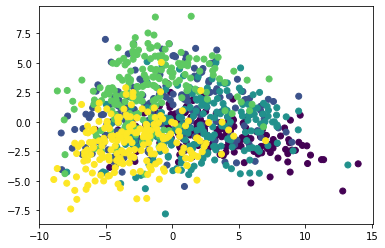

In [21]:
 print("====UNCLUSTERED RAW DATA====")
 data_vectorized=vectorizer.fit_transform(data['Text'])
 new_data_vectorized=data_vectorized.toarray()
 pca = PCA(n_components=2)
 X_pca_data=pca.fit_transform(new_data_vectorized)
 plt.scatter(X_pca_data[:, 0], X_pca_data[:, 1], c=data['label'])

====TEST DATA CLUSTER====


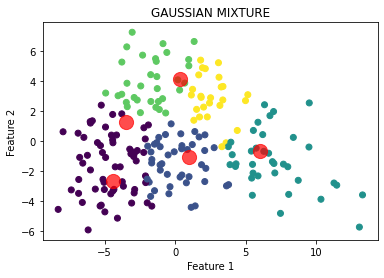

In [22]:
 print("====TEST DATA CLUSTER====")
predicted_labels=gmm.predict(X_pca_test)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=predicted_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('GAUSSIAN MIXTURE')
plt.show()

In [23]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, labels)
print("Silhouette for EM with Bag of words is ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, predicted_labels)
print("kappa for EM with Bag of words is ",kappa )
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, predicted_labels)
print("Coherence for EM with Bag of words is:", ari)
print("_________________________________________________________________________")

Silhouette for EM with Bag of words is  0.36222127913358415
_________________________________________________________________________
kappa for EM with Bag of words is  0.07326781938051996
_________________________________________________________________________
Coherence for EM with Bag of words is: 0.13500456878181127
_________________________________________________________________________


#Heirarchial with Bag of words 


In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

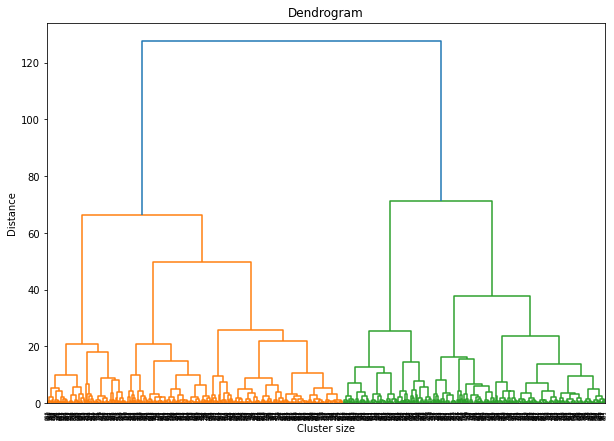

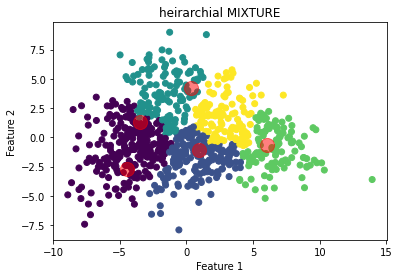

In [25]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score, cohen_kappa_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
linkage_matrix = linkage(X_pca_train, 'ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, orientation='top')
plt.xlabel("Cluster size")
plt.ylabel("Distance")
plt.title("Dendrogram")
plt.show()

# Agglomerative clustering with 5 clusters
n_clusters = 5
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg.fit(X_pca_train)

# Print cluster labels
labels = agg.labels_

print("==============================================================================================")


# Plot the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("heirarchial MIXTURE")
plt.show()

====TEST DATA CLUSTER====


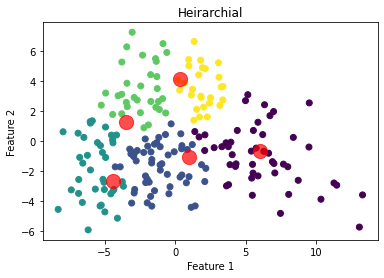

In [26]:
print("====TEST DATA CLUSTER====")
predicted_labels=agg.fit_predict(X_pca_test)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=predicted_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Heirarchial')
plt.show()

In [27]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, labels)
print("Silhouette for Heirarchial with Bag of words is ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, predicted_labels)
print("kappa for Heirarchial with Bag of words is ",kappa )
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, predicted_labels)
print("Coherence for Heirarchial with Bag of words is:", ari)
print("_________________________________________________________________________")

Silhouette for Heirarchial with Bag of words is  0.34116056482212875
_________________________________________________________________________
kappa for Heirarchial with Bag of words is  0.08070416809980929
_________________________________________________________________________
Coherence for Heirarchial with Bag of words is: 0.14236601960660908
_________________________________________________________________________


#TF-IDF k-means


In [28]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['label'], test_size=0.2, random_state=42)

In [29]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.fit_transform(X_test)
new_X_train=X_train_vectorized.toarray()
new_X_test = X_test_vectorized.toarray()

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

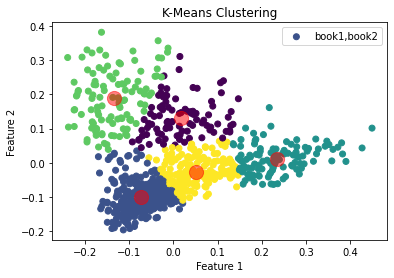

In [72]:
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_pca_train)

# Get the predicted cluster labels
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
# Plot the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels , label = "book1")
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

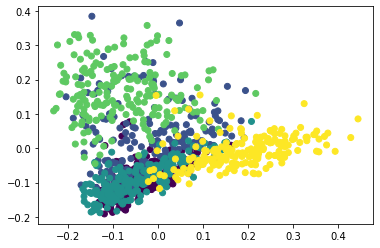

In [32]:
 data_vectorized=vectorizer.fit_transform(data['Text'])
 new_data_vectorized=data_vectorized.toarray()
 pca = PCA(n_components=2)
 X_pca_data=pca.fit_transform(new_data_vectorized)
 plt.scatter(X_pca_data[:, 0], X_pca_data[:, 1], c=data['label'])

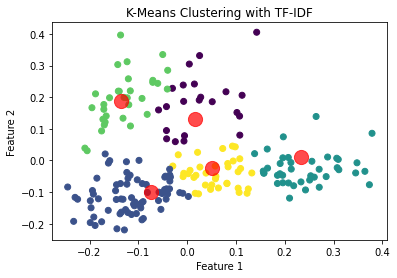

In [33]:
predicted_labels=kmeans.predict(X_pca_test)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=predicted_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with TF-IDF')
plt.show()

In [34]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, labels)
print("Silhouette for KMEANS with TFIDF is ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, predicted_labels)
print("kappa for KMEANS with TFIDF is ",kappa )
kktdf = kappa
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, predicted_labels)
print("Coherence for KMEANS with TFIDF is:", ari)
print("_________________________________________________________________________")

Silhouette for KMEANS with TFIDF is  0.41862779270975126
_________________________________________________________________________
kappa for KMEANS with TFIDF is  0.07062021875197566
_________________________________________________________________________
Coherence for KMEANS with TFIDF is: 0.28380961966439866
_________________________________________________________________________


#tfidf gmm


In [35]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.fit_transform(X_test)
new_X_train=X_train_vectorized.toarray()
new_X_test = X_test_vectorized.toarray()

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

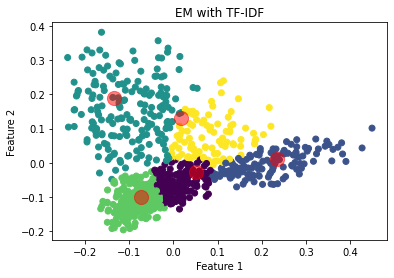

In [37]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(X_pca_train)

# Get the predicted cluster labels
gmm_labels = gmm.predict(X_pca_train)

# Plot the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=gmm_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('EM with TF-IDF')
plt.show()

====UNCLUSTERED RAW DATA====


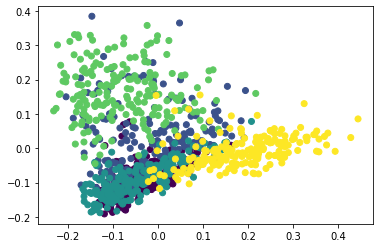

In [38]:
 print("====UNCLUSTERED RAW DATA====")
 data_vectorized=vectorizer.fit_transform(data['Text'])
 new_data_vectorized=data_vectorized.toarray()
 pca = PCA(n_components=2)
 X_pca_data=pca.fit_transform(new_data_vectorized)
 plt.scatter(X_pca_data[:, 0], X_pca_data[:, 1], c=data['label'])

====TEST DATA CLUSTER====


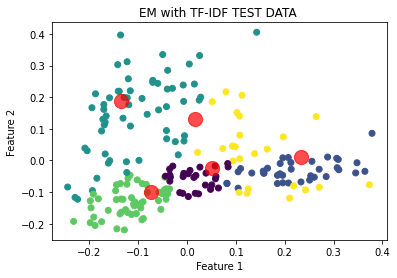

In [39]:
print("====TEST DATA CLUSTER====")
predicted_labels=gmm.predict(X_pca_test)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=predicted_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('EM with TF-IDF TEST DATA ')
plt.show()

In [40]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, labels)
print("Silhouette for GMM with TF-IDF is ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, predicted_labels)
print("kappa for GMM with TF-IDF is ",kappa )
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, predicted_labels)
print("Coherence for GMM with TF-IDF is:", ari)
print("_________________________________________________________________________")

Silhouette for GMM with TF-IDF is  0.4186262148925485
_________________________________________________________________________
kappa for GMM with TF-IDF is  -0.08458517733590964
_________________________________________________________________________
Coherence for GMM with TF-IDF is: 0.28601198738877137
_________________________________________________________________________


#TFIDF HEIRARCHIAL 


In [41]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.fit_transform(X_test)
new_X_train=X_train_vectorized.toarray()
new_X_test = X_test_vectorized.toarray()

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

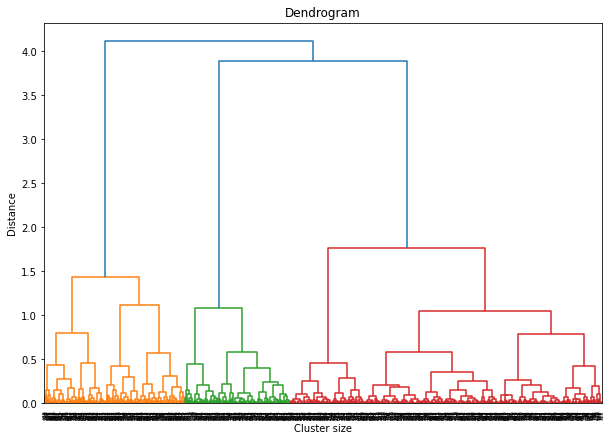

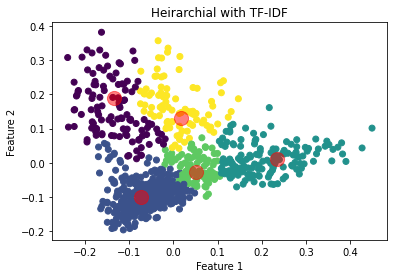

In [65]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score, cohen_kappa_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
linkage_matrix = linkage(X_pca_train, 'ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, orientation='top')
plt.xlabel("Cluster size")
plt.ylabel("Distance")
plt.title("Dendrogram")
plt.show()

# Agglomerative clustering with 5 clusters
n_clusters = 5
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg.fit(X_pca_train)

# Print cluster labels
labels = agg.labels_
agg.fit_predict(X_pca_test)
print("==============================================================================================")
 


# Plot the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Heirarchial with TF-IDF")
plt.show()

predicted_labels = agg.fit_predict(X_pca_test)

In [45]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, labels)
print("Silhouette for Heirarchial with TF-IDF ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, predicted_labels)
print("kappa for Heirarchial with TF-IDF ",kappa )
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, predicted_labels)
print("Coherence for Heirarchial with TF-IDF:", ari)
print("_________________________________________________________________________")

Silhouette for Heirarchial with TF-IDF  0.365705263037213
_________________________________________________________________________
kappa for Heirarchial with TF-IDF  0.08371252259552453
_________________________________________________________________________
Coherence for Heirarchial with TF-IDF: 0.2535427959710385
_________________________________________________________________________


#WORD EMBEDDING 

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

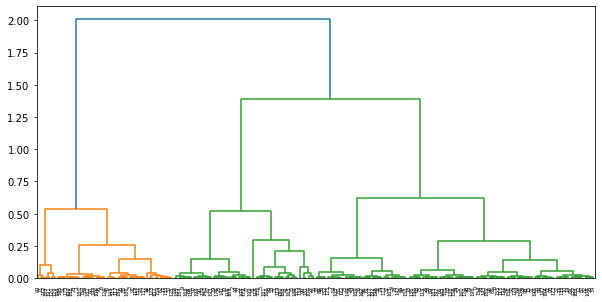

In [47]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("book_partitions.csv")



# Train word2vec model
sentences = [doc.split() for doc in X_train]
model = Word2Vec(sentences, size=100, window=5, min_count=5, workers=4)

# Get document vectors
doc_vectors = []
for doc in sentences:
    vecs = [model.wv[word] for word in doc if word in model.wv]
    if vecs:
        doc_vectors.append(np.mean(vecs, axis=0))
    else:
        doc_vectors.append(np.zeros((100,)))

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(doc_vectors)

sentences = [doc.split() for doc in X_test]
model = Word2Vec(sentences, size=100, window=5, min_count=5, workers=4)

# Get document vectors
doc_vectors = []
for doc in sentences:
    vecs = [model.wv[word] for word in doc if word in model.wv]
    if vecs:
        doc_vectors.append(np.mean(vecs, axis=0))
    else:
        doc_vectors.append(np.zeros((100,)))

X_pca_test = pca.fit_transform(doc_vectors)


# Cluster with k-means
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_pca_train)
kmeans_labels = kmeans.labels_
km_predicted_labels = kmeans.predict(X_pca_test)

# Cluster with Gaussian mixture
gmm = GaussianMixture(n_components=5, random_state=0).fit(X_pca_train)
gmm_labels = gmm.predict(X_pca_train)
gmm_predicted_labels = gmm.predict(X_pca_test)

# Cluster with hierarchical clustering
Z = linkage(doc_vectors, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()



In [48]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, kmeans_labels)
print("Silhouette for Heirarchial with Word2VEC is ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, km_predicted_labels)
print("kappa for Heirarchial with Word2VEC is ",kappa )
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, km_predicted_labels)
print("Coherence for Heirarchial with Word2VEC is:", ari)
print("_________________________________________________________________________")

Silhouette for Heirarchial with Word2VEC is  0.3354924119120593
_________________________________________________________________________
kappa for Heirarchial with Word2VEC is  0.060885897636562825
_________________________________________________________________________
Coherence for Heirarchial with Word2VEC is: 0.04133076043916488
_________________________________________________________________________


In [50]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, labels)
print("Silhouette for Heirarchial with Word2VEC is ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, predicted_labels)
print("kappa for Heirarchial with Word2VEC is ",kappa )
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, predicted_labels)
print("Coherence for Heirarchial with Word2VEC is:", ari)
print("_________________________________________________________________________")

Silhouette for Heirarchial with Word2VEC is  -0.04766617601510857
_________________________________________________________________________
kappa for Heirarchial with Word2VEC is  0.08371252259552453
_________________________________________________________________________
Coherence for Heirarchial with Word2VEC is: 0.2535427959710385
_________________________________________________________________________


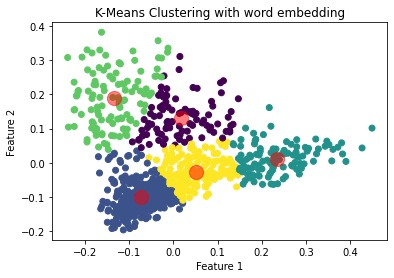

In [60]:

# Plot the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with word embedding')
plt.show()

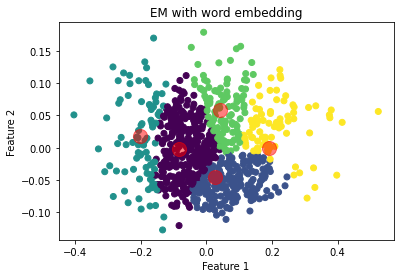

In [52]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(X_pca_train)

# Get the predicted cluster labels
gmm_labels = gmm.predict(X_pca_train)

# Plot the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=gmm_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('EM with word embedding')
plt.show()

====TEST DATA CLUSTER====


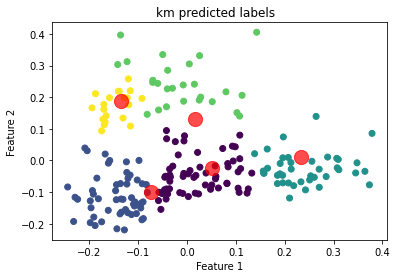

In [66]:
print("====TEST DATA CLUSTER====")
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=predicted_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('km predicted labels  ')
plt.show()

====TEST DATA CLUSTER====


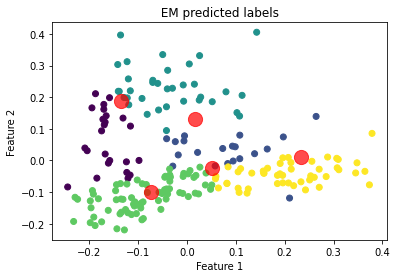

In [67]:
print("====TEST DATA CLUSTER====")
predicted_labels=gmm.predict(X_pca_test)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=predicted_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(' EM predicted labels ')
plt.show()

#LDA 

In [53]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans, AgglomerativeClustering
import numpy as np
import pandas as pd

In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

Coherence K-means with LDA: 0.6117241090547234
Coherence GMM with LDA: 0.359520590954284
Coherence Hierarchical with LDA: 0.572748936992505
______________________________________________________________________________________
Kappa K-means with LDA: -0.06125000000000003
Kappa GMM with LDA: 0.11875000000000002
Kappa Hierarchical with LDA : 0.23624999999999996
______________________________________________________________________________________
Silhouette K-means with LDA: 0.6117241090547234
Silhouette GMM with LDA: 0.359520590954284
Silhouette Hierarchical with LDA: 0.572748936992505
______________________________________________________________________________________


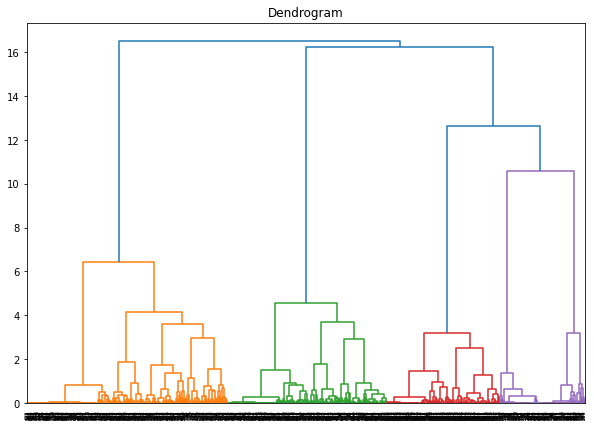

In [55]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score, cohen_kappa_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
df = pd.read_csv('book_partitions.csv')

# Convert the text to bag of words
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
bow = vectorizer.fit_transform(df['Text'])

# Perform LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit_transform(bow)

# Transform to topics
topics = lda.transform(bow)

# Run K-means clustering algorithm
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(topics)
kmeans.predict()
# Run Gaussian Mixture Model clustering algorithm
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(topics)

# Run Hierarchical clustering algorithm
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg.fit(topics)

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = dendrogram(linkage(topics, method='ward'))

# Calculate coherence
coherence_kmeans = silhouette_score(topics, kmeans.labels_)
coherence_gmm = silhouette_score(topics, gmm.predict(topics))
coherence_agg = silhouette_score(topics, agg.labels_)

# Calculate kappa
true_labels = df['Author'].astype('category').cat.codes
kappa_kmeans = cohen_kappa_score(true_labels, kmeans.labels_)
kappa_gmm = cohen_kappa_score(true_labels, gmm.predict(topics))
kappa_agg = cohen_kappa_score(true_labels, agg.labels_)

# Calculate silhouette
silhouette_kmeans = silhouette_score(topics, kmeans.labels_)
silhouette_gmm = silhouette_score(topics, gmm.predict(topics))
silhouette_agg = silhouette_score(topics, agg.labels_)

# Print the results
print("Coherence K-means with LDA:", coherence_kmeans)
print("Coherence GMM with LDA:", coherence_gmm)
print("Coherence Hierarchical with LDA:", coherence_agg)
print("______________________________________________________________________________________")
print("Kappa K-means with LDA:", kappa_kmeans)
print("Kappa GMM with LDA:", kappa_gmm)
print("Kappa Hierarchical with LDA :", kappa_agg)
print("______________________________________________________________________________________")
print("Silhouette K-means with LDA:", silhouette_kmeans)
print("Silhouette GMM with LDA:", silhouette_gmm)
print("Silhouette Hierarchical with LDA:", silhouette_agg)
print("______________________________________________________________________________________")




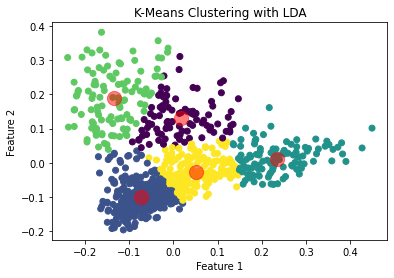

In [56]:
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_pca_train)

# Get the predicted cluster labels
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
# Plot the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with LDA')
plt.show()

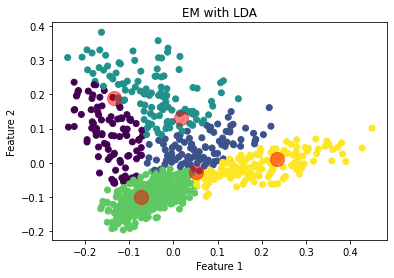

In [57]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(X_pca_train)

# Get the predicted cluster labels
gmm_labels = gmm.predict(X_pca_train)

# Plot the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=gmm_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('EM with LDA')
plt.show()

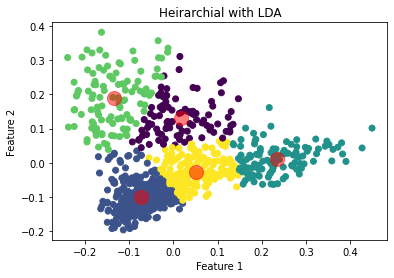

In [58]:
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Heirarchial with LDA")
plt.show()

In [ ]:
print("====TEST DATA CLUSTER====")
predicted_labels=gmm.predict(X_pca_test)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=predicted_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(' EM predicted labels ')
plt.show()